12.topic_models.ipynb

12.topic-models-with-graphlab.ipynb

In [2]:
%matplotlib inline
from __future__ import print_function
from wordcloud import WordCloud
from gensim import corpora, models, similarities,  matutils
import matplotlib.pyplot as plt
import numpy as np

Download data¶
http://www.cs.princeton.edu/~blei/lda-c/ap.tgz

In [3]:
corpus = corpora.BleiCorpus('F:/test/ap/ap.dat','F:/test/ap/vocab.txt')

In [4]:

' '.join(dir(corpus))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __iter__ __len__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _load_specials _save_specials _smart_save docbyoffset fname id2word index length line2doc load save save_corpus serialize'

In [5]:
corpus.id2word.items()[:3]

[(0, u'i'), (1, u'new'), (2, u'percent')]

In [6]:
# 建立主题模型

NUM_TOPICS = 100

In [7]:
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=None)


In [8]:
' '.join(dir(model))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _apply _load_specials _save_specials _smart_save alpha bound chunksize clear decay dispatcher distributed do_estep do_mstep eta eval_every expElogbeta gamma_threshold get_document_topics get_topic_terms id2word inference init_dir_prior iterations load log_perplexity minimum_probability num_terms num_topics num_updates numworkers offset optimize_alpha optimize_eta passes print_topic print_topics save show_topic show_topics state sync_state top_topics update update_alpha update_eta update_every'

In [9]:
document_topics = [model[c] for c in corpus]

In [10]:
# how many topics does one document cover?
document_topics[2]

[(10, 0.024304846420051571),
 (27, 0.14896698899766334),
 (51, 0.68297702162761653),
 (77, 0.012152995040196898),
 (88, 0.030931031619706503),
 (91, 0.087755881603521185)]

In [11]:
# The first topic
# format: weight, term
model.show_topic(0, 10)

[(u'children', 0.02092858113462762),
 (u'birth', 0.011991239988534559),
 (u'aliens', 0.0088153616191168523),
 (u'welfare', 0.0074785415115624782),
 (u'shoes', 0.0072157030844745146),
 (u'betty', 0.0064745993823489764),
 (u'illegal', 0.0062519972122636316),
 (u'ms', 0.006202490854275081),
 (u'couples', 0.0056094228314470685),
 (u'government', 0.005463729739211969)]

In [12]:
# The 100 topic
# format: weight, term
model.show_topic(99, 10)

[(u'venus', 0.018269665250031535),
 (u'jupiter', 0.017537977421167618),
 (u'imperial', 0.014493812489517865),
 (u'palace', 0.0097322277777906353),
 (u'i', 0.0094016588279248123),
 (u'exiles', 0.0073952610957989974),
 (u'princess', 0.00667081082879352),
 (u'emperor', 0.006023488806645912),
 (u'vaccine', 0.005448569395289142),
 (u'agency', 0.0054165886724060154)]

In [13]:
words = model.show_topic(0, 5)
words

[(u'children', 0.02092858113462762),
 (u'birth', 0.011991239988534559),
 (u'aliens', 0.0088153616191168523),
 (u'welfare', 0.0074785415115624782),
 (u'shoes', 0.0072157030844745146)]

In [14]:
model.show_topics(4)

[(45,
  u'0.007*state + 0.006*i + 0.005*new + 0.005*united + 0.005*people + 0.004*government + 0.004*years + 0.004*states + 0.003*american + 0.003*two'),
 (88,
  u'0.018*police + 0.008*two + 0.006*humphrey + 0.006*killed + 0.005*rocks + 0.005*government + 0.005*military + 0.005*united + 0.005*humphreys + 0.004*people'),
 (38,
  u'0.014*trial + 0.011*gesell + 0.011*walsh + 0.010*documents + 0.009*government + 0.009*trials + 0.008*illegally + 0.008*north + 0.008*court + 0.008*case'),
 (74,
  u'0.038*keefe + 0.017*heroes + 0.009*lightning + 0.009*computer + 0.007*hero + 0.006*patrons + 0.006*year + 0.006*percent + 0.005*classic + 0.005*budget')]

In [15]:
for f, w in words[:10]:
    print(f, w)

children 0.0209285811346
birth 0.0119912399885
aliens 0.00881536161912
welfare 0.00747854151156
shoes 0.00721570308447


In [16]:
# write out topcis with 10 terms with weights
for ti in range(model.num_topics):
    words = model.show_topic(ti, 10)
    tf = sum(w for f, w in words)
    with open('F:/test/topics_term_weight.txt', 'a') as output:
        for f, w in words:
            line = str(ti) + '\t' +  f + '\t' + str(w/tf) 
            output.write(line + '\n')

In [17]:
# We first identify the most discussed topic, i.e., the one with the
# highest total weight
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

In [18]:
# Get the top 64 words for this topic
# Without the argument, show_topic would return only 10 words
words = model.show_topic(max_topic, 64)
words = np.array(words).T
words_freq=[float(i)*10000000 for i in words[1]]
words = zip(words[0], words_freq)

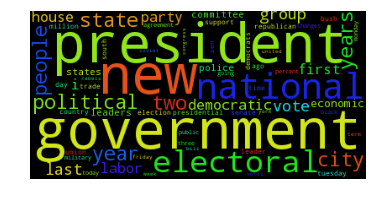

In [19]:
wordcloud = WordCloud().generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

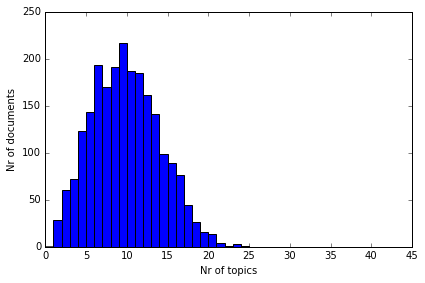

In [20]:
num_topics_used = [len(model[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
#fig.savefig('Figure_04_01.png')

In [21]:
# Now, repeat the same exercise using alpha=1.0
# You can edit the constant below to play around with this parameter
ALPHA = 1.0
model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=ALPHA)

num_topics_used1 = [len(model1[doc]) for doc in corpus]

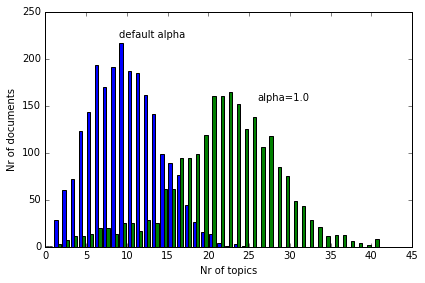

In [22]:
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
# The coordinates below were fit by trial and error to look good
plt.text(9, 223, r'default alpha')
plt.text(26, 156, 'alpha=1.0')
fig.tight_layout()

In [23]:
with open('F:/test/ap/ap.txt', 'r') as f:
    dat = f.readlines()

In [24]:
dat[:6]

['<DOC>\n',
 '<DOCNO> AP881218-0003 </DOCNO>\n',
 '<TEXT>\n',
 " A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Fri

In [25]:
dat[4].strip()[0]

'<'

In [26]:
docs = []
for i in dat[:100]:
    if i.strip()[0] != '<':
        docs.append(i)

In [27]:
def clean_doc(doc):
    doc = doc.replace('.', '').replace(',', '')
    doc = doc.replace('``', '').replace('"', '')
    doc = doc.replace('_', '').replace("'", '')
    doc = doc.replace('!', '')
    return doc
docs = [clean_doc(doc) for doc in docs]

In [28]:
texts = [[i for i in doc.lower().split()] for doc in docs]

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [30]:
' '.join(stop)

u'i me my myself we our ours ourselves you your yours yourself yourselves he him his himself she her hers herself it its itself they them their theirs themselves what which who whom this that these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don should now d ll m o re ve y ain aren couldn didn doesn hadn hasn haven isn ma mightn mustn needn shan shouldn wasn weren won wouldn'

In [31]:
stop.append('said')

In [32]:
docs[8]

' Here is a summary of developments in forest and brush fires in Western states:\n'

In [33]:
' '.join(texts[9])

'jean-pierre stirbois the no 2 man in the extreme-right national front after party leader jean-marie le pen died saturday in an automobile accident police said he was 43 stirbois attended a political meeting friday in the city of dreux about 60 miles west of paris and was traveling toward the capital when his car ran off the road and smashed into a tree at about 2:40 am police said stirbois was secretary-general of the national front and a member of the party leadership since 1981 he was born jan 30 1945 in paris held degrees in law and marketing and headed his own printing business stirbois was active in several extreme-right political movements before joining the national front in 1977 in 1982 he won 126 percent of the vote in local elections in the district of eure-et-loir west of paris the highest vote percentage in france for a right-wing candidate a year and a half later he won the election for deputy mayor of dreux stirbois was elected a deputy in the national assembly in 1986 h

In [34]:
dictionary = corpora.Dictionary(texts)
lda_corpus = [dictionary.doc2bow(text) for text in texts]
#The function doc2bow() simply counts the number of occurences of each distinct word, 
# converts the word to its integer word id and returns the result as a sparse vector. 

In [1]:
lda_model = models.ldamodel.LdaModel(
    lda_corpus, num_topics=NUM_TOPICS, id2word=dictionary, alpha=None)

NameError: name 'models' is not defined

## windows 似乎无法安装pyladvis

In [ ]:
import pyLDAvis.gensim     

ap_data = pyLDAvis.gensim.prepare(lda_model, lda_corpus, dictionary)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.display(ap_data)

In [ ]:
pyLDAvis.save_html(ap_data, 'C:\cjc2016\code\cjc2016\vis\ap_ldavis.html')

|东风夜放花千树：对宋词进行主题分析初探 http://chengjun.github.io/cn/2013/09/topic-modeling-of-song-peom/